In [1]:
from main import ClusterHandler
import pandas as pd
from pyspark.ml.feature import PCA

In [2]:
data = pd.read_csv("data/superconductivity.csv")

In [7]:
handler = ClusterHandler(data, y="critical_temp")
handler.run_session()
handler.generate_dataframe()


Session 'Session' created on masternode local[*]
Spark UI is available at http://SERENITY.mshome.net:4041



In [8]:
handler.assemble_features()  

In [9]:
handler.scale_features()

In [12]:
dimensions = 5
model = PCA(k=dimensions, inputCol="scaledFeatures", outputCol="pcaFeatures")
handler.fit_pca(model)
handler.pca_result.show()

+------------------+----------------+--------------------+-----------------+---------------------+-------------------+-----------------------+-----------------+---------------------+----------------+-------------------+--------+----------------+----------------+----------------+----------------+-----------------+---------+----------------+----------------+----------------+------------------+----------------------+-------------------+-----------------------+---------------------+-------------------------+-------------------+-----------------------+-----------------+---------------------+------------+----------------+----------------+-----------------+-----------------+-------------------+-------------+-----------------+----------------+----------------+---------------------+-------------------------+----------------------+--------------------------+------------------------+----------------------------+----------------------+--------------------------+--------------------+---------------

In [15]:
for dim in range(0, dimensions): 
    print(f"Coefficients for dimension {dim}: {handler.extract_pca_coefficients(dimension=dim)}")

Coefficients for dimension 0: {'range_fie': -0.1639782764776125, 'wtd_std_fie': -0.16348764769240792, 'range_atomic_radius': -0.1634811625790672, 'wtd_entropy_atomic_radius': -0.16345692130405054, 'wtd_std_atomic_radius': -0.16047256302228072, 'entropy_Valence': -0.15874646513076654, 'entropy_fie': -0.15662157955307526, 'wtd_entropy_atomic_mass': -0.15646455562351227, 'wtd_entropy_Valence': -0.1560122414245672, 'number_of_elements': -0.15577832905215527, 'wtd_gmean_Density': 0.1556402231571363, 'std_fie': -0.1553437471172357, 'entropy_atomic_radius': -0.1533936897818123, 'gmean_Density': 0.15048198242158242, 'std_atomic_radius': -0.14970272803185963, 'wtd_gmean_Valence': 0.14662669182410515, 'entropy_atomic_mass': -0.1464185352807459, 'wtd_mean_Valence': 0.1445689089556572, 'range_ThermalConductivity': -0.14328760989290723, 'wtd_entropy_FusionHeat': -0.14307348824604427, 'gmean_Valence': 0.14108114411092756, 'entropy_ElectronAffinity': -0.14001682948911232, 'mean_Valence': 0.1396859022

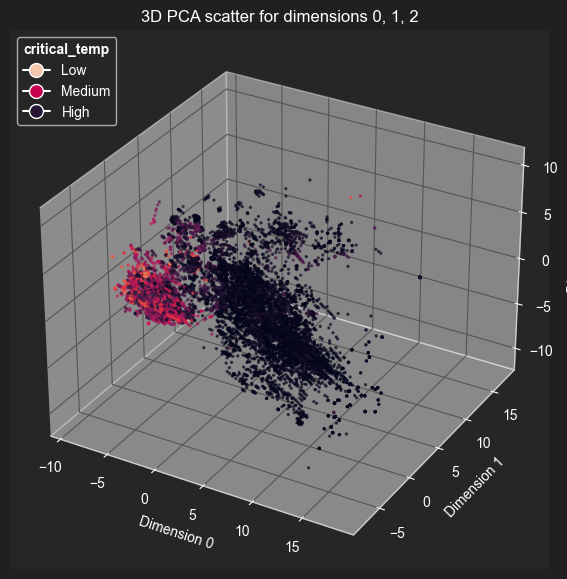

In [16]:
handler.plot_3d_pca(dimensions=[0,1,2], color_by="critical_temp")